# SmoteR Algorithm

Here we use the forest fires dataset from Kaggle and the notebook from https://www.kaggle.com/aleksandradeis/regression-addressing-extreme-rare-cases

In [18]:
import pandas as pd

fires = pd.read_csv("/Users/mling/OutSource/test/data/forestfires.csv")
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [19]:
fires = fires.drop(columns=['X', 'Y'])

fires.groupby('month').agg('count')

,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
month,,,,,,,,,,
apr,9,9,9,9,9,9,9,9,9,9
aug,184,184,184,184,184,184,184,184,184,184
dec,9,9,9,9,9,9,9,9,9,9
feb,20,20,20,20,20,20,20,20,20,20
jan,2,2,2,2,2,2,2,2,2,2
jul,32,32,32,32,32,32,32,32,32,32
jun,17,17,17,17,17,17,17,17,17,17
mar,54,54,54,54,54,54,54,54,54,54
may,2,2,2,2,2,2,2,2,2,2


In [20]:
months_to_remove = ['nov', 'jan', 'may']

fires[fires['month'].isin(months_to_remove)]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
104,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
304,may,sat,85.1,28.0,113.8,3.5,11.3,94,4.9,0.0,0.00
379,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
471,may,fri,89.6,25.4,73.7,5.7,18.0,40,4.0,0.0,38.48
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


1. Drop months ['nov', 'jan', 'may']
2. One-hot encoding for categorical variables month and days for KNN algorithm

In [21]:
fires = fires.drop(fires[fires.month.isin(months_to_remove)].index ,axis=0)

fires = pd.get_dummies(fires)

check the target variable 'area' distribution 

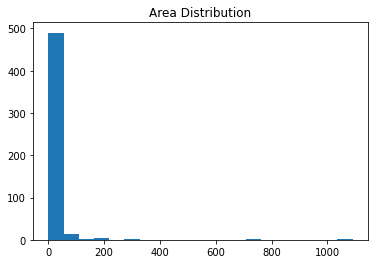

In [22]:
import matplotlib.pyplot as plt

plt.hist(fires.area, bins=20)
plt.title('Area Distribution')
plt.show()

Create relevance function: small values for common cases and almost 1 for rare cases.

In [23]:
import numpy as np
import math

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relevance(x):
    x = np.array(x)
    return sigmoid(x - 50)

In [24]:
D = fires.copy()

target = 'area'

y_bar = D[target].median()

th = 0.999  #  threshold

In [25]:
y_bar

0.545

Considering the rare cases

In [26]:
rareL = D[(relevance(D[target]) > th) & (D[target] > y_bar)]  

In [27]:
rareL

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_mar,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
227,92.2,81.8,480.8,11.9,20.1,34,4.5,0.0,58.30,0,...,0,0,0,0,0,1,0,0,0,0
228,93.5,149.3,728.6,8.1,28.3,26,3.1,0.0,64.10,0,...,0,0,1,0,0,0,1,0,0,0
229,92.2,81.8,480.8,11.9,16.4,43,4.0,0.0,71.30,0,...,0,0,0,0,0,1,0,0,0,0
230,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49,0,...,0,0,1,0,0,0,0,0,0,1
231,93.5,149.3,728.6,8.1,27.8,27,3.1,0.0,95.18,0,...,0,0,1,0,0,0,1,0,0,0
232,91.0,129.5,692.6,7.0,18.7,43,2.7,0.0,103.39,0,...,0,0,1,0,0,0,0,0,1,0
233,84.4,73.4,671.9,3.2,24.3,36,3.1,0.0,105.66,0,...,0,0,1,0,0,0,0,0,1,0
234,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88,0,...,0,0,1,0,0,1,0,0,0,0
235,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48,0,...,0,0,0,0,0,0,1,0,0,0
236,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,0,...,0,0,1,0,0,1,0,0,0,0


In [28]:
rareH = D[(relevance(D[target]) > th) & (D[target] < y_bar)]  

In [29]:
rareH

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_mar,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed


Build synthetic cases - step by step of Algorithm 2 in 'SMOTE for Regression'

In [30]:
from sklearn.neighbors import KNeighborsRegressor

o = 200  # over sampling rate as percentage %
ng = 0//100

k = 3  # number of nearest neighbors to use for the generation

for index, case in D.iloc[:1].iterrows():
    knn = KNeighborsRegressor(n_neighbors = k+1)  # k+1 because the case is the nearest neighbor to itself
    knn.fit(D.drop(columns = [target]).values, D[[target]])  # warning: this step is very expensive

In [31]:
case

FFMC         86.2
DMC          26.2
DC           94.3
ISI           5.1
temp          8.2
RH           51.0
wind          6.7
rain          0.0
area          0.0
month_apr     0.0
month_aug     0.0
month_dec     0.0
month_feb     0.0
month_jul     0.0
month_jun     0.0
month_mar     1.0
month_oct     0.0
month_sep     0.0
day_fri       1.0
day_mon       0.0
day_sat       0.0
day_sun       0.0
day_thu       0.0
day_tue       0.0
day_wed       0.0
Name: 0, dtype: float64

In [32]:
neighbors = knn.kneighbors(case.drop(labels = [target]).values.reshape(1, -1), return_distance=False).reshape(-1)

In [33]:
neighbors

array([  0,  19, 200, 145])

In [34]:
index

0

In [35]:
neighbors = np.delete(neighbors, np.where(neighbors == index))

In [36]:
neighbors

array([ 19, 200, 145])

choose one of the neighbor randomly and create a new data point whose values are stored in attr

In [37]:
x = D.iloc[neighbors[np.random.randint(k)]]
categorical_col = ['month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
                   'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 
                   'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed']
attr = {}

for a in D.columns:
    if a == target:  # skip
        continue
    if a in categorical_col:  # randomly pick one from either 'case' or 'x'
        if np.random.randint(2) == 0:
            attr[a] = case[a]
        else:
            attr[a] = x[a]
    else: 
        diff = case[a] - x[a]
        attr[a] = case[a] + np.random.randn() * diff  # there might be a mistake on the notebook, we follow the notion in the paper
        

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

new = np.array(list(attr.values()))

# you can freely choose the distance function you like.

d1 = cosine_similarity(new.reshape(1, -1), case.drop(labels=[target]).values.reshape(1, -1))[0][0]
d2 = cosine_similarity(new.reshape(1, -1), x.drop(labels=[target]).values.reshape(1, -1))[0][0]

attr[target] = (d2 * case[target] + d1 * x[target]) / (d1 + d2)

In [39]:
attr[target]

0.47632732620099055

Let us put things together

In [40]:
def get_synth_cases(D, target, o=200, k=3, categorical_col = []):
    '''
    Function to generate the new cases.
    INPUT:
        D - pd.DataFrame with the initial data
        target - string name of the target column in the dataset
        o - oversampling rate
        k - number of nearest neighbors to use for the generation
        categorical_col - list of categorical column names
    OUTPUT:
        new_cases - pd.DataFrame containing new generated cases
    '''
    new_cases = pd.DataFrame(columns = D.columns, dtype=object) # initialize the list of new cases 
    ng = o // 100 # the number of new cases to generate
    for index, case in D.iterrows():
        # find k nearest neighbors of the case
        knn = KNeighborsRegressor(n_neighbors = k+1) # k+1 because the case is the nearest neighbor to itself
        knn.fit(D.drop(columns = [target]).values, D[[target]])
        neighbors = knn.kneighbors(case.drop(labels = [target]).values.reshape(1, -1), return_distance=False).reshape(-1)
        neighbors = np.delete(neighbors, np.where(neighbors == index))
        for i in range(0, ng):
            # randomly choose one of the neighbors
            x = D.iloc[neighbors[np.random.randint(k)]]
            attr = {}          
            for a in D.columns:
                # skip target column
                if a == target:
                    continue;
                if a in categorical_col:
                    # if categorical then choose randomly one of values
                    if np.random.randint(2) == 0:
                        attr[a] = case[a]
                    else:
                        attr[a] = x[a]
                else:
                    # if continious column
                    diff = case[a] - x[a]
                    attr[a] = case[a] + np.random.randn() * diff
            # decide the target column
            new = np.array(list(attr.values()))
            d1 = cosine_similarity(new.reshape(1, -1), case.drop(labels = [target]).values.reshape(1, -1))[0][0]
            d2 = cosine_similarity(new.reshape(1, -1), x.drop(labels = [target]).values.reshape(1, -1))[0][0]
            attr[target] = (d2 * case[target] + d1 * x[target]) / (d1 + d2)
            
            # append the result
            new_cases = new_cases.append(attr,ignore_index = True)
                    
    return new_cases


def SmoteR(D, target, th = 0.999, o = 200, u = 100, k = 3, categorical_col = []):
    '''
    The implementation of SmoteR algorithm:
    https://core.ac.uk/download/pdf/29202178.pdf
    INPUT:
        D - pd.DataFrame - the initial dataset
        target - the name of the target column in the dataset
        th - relevance threshold
        o - oversampling rate
        u - undersampling rate
        k - the number of nearest neighbors
    OUTPUT:
        new_D - the resulting new dataset
    '''
    # median of the target variable
    y_bar = D[target].median()
    
    # find rare cases where target less than median
    rareL = D[(relevance(D[target]) > th) & (D[target] > y_bar)]  
    # generate rare cases for rareL
    new_casesL = get_synth_cases(rareL, target, o, k , categorical_col)
    
    # find rare cases where target greater than median
    rareH = D[(relevance(D[target]) > th) & (D[target] < y_bar)]
    # generate rare cases for rareH
    new_casesH = get_synth_cases(rareH, target, o, k , categorical_col)
    
    new_cases = pd.concat([new_casesL, new_casesH], axis=0)
    
    # undersample norm cases
    norm_cases = D[relevance(D[target]) <= th]
    # get the number of norm cases
    nr_norm = int(len(norm_cases) * u / 100)
    
    norm_cases = norm_cases.sample(min(len(D[relevance(D[target]) <= th]), nr_norm))
    
    # get the resulting dataset
    new_D = pd.concat([new_cases, norm_cases], axis=0)
    
    return new_D

In [41]:
Xs = SmoteR(D, target='area', th = 0.999, o = 300, u = 100, k = 10, categorical_col = ['month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu',
       'day_tue', 'day_wed'])

In [42]:
Xs

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_mar,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,92.200000,81.800000,480.800000,11.900000,23.978597,33.556018,3.885181,0.0,64.800856,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,92.566222,73.012308,287.210734,18.660916,20.203073,39.705040,4.005177,0.0,70.557642,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,91.867357,185.278224,459.916939,12.066456,19.102329,23.266756,4.856037,0.0,72.219599,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,93.500000,149.300000,728.600000,8.100000,28.559991,25.315860,3.100000,0.0,79.640020,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,92.748434,81.571367,814.943866,7.356070,27.274021,33.521572,3.299669,0.0,132.462041,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,95.200000,217.700000,690.000000,18.000000,23.400000,49.000000,5.400000,0.0,6.430000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
316,92.400000,96.200000,739.400000,8.600000,18.600000,24.000000,5.800000,0.0,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
247,92.200000,91.600000,503.600000,9.600000,20.700000,70.000000,2.200000,0.0,0.750000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
438,93.700000,231.100000,715.100000,8.400000,23.600000,53.000000,4.000000,0.0,6.430000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Now you know how it works. Let us use open source package directly

Be careful about the license, it is better to focus on MIT, Apache 2.0, and BSD III which can be applied on commercial software.

In [ ]:
# conda install -c conda-forge imbalanced-learn -y

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
fires

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_mar,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0,...,1,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0,...,1,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,0
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,1,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
fires['label'] = (relevance(D[target]) > th) & (D[target] > y_bar)
fires['label'] = fires['label'].astype(int)

In [46]:
fires.head(5)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,label
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,1,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,1,0,0,0,1,0,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,...,0,0,1,0,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [47]:
fires[fires['label']==1]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,label
227,92.2,81.8,480.8,11.9,20.1,34,4.5,0.0,58.30,0,...,0,0,0,0,1,0,0,0,0,1
228,93.5,149.3,728.6,8.1,28.3,26,3.1,0.0,64.10,0,...,0,1,0,0,0,1,0,0,0,1
229,92.2,81.8,480.8,11.9,16.4,43,4.0,0.0,71.30,0,...,0,0,0,0,1,0,0,0,0,1
230,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49,0,...,0,1,0,0,0,0,0,0,1,1
231,93.5,149.3,728.6,8.1,27.8,27,3.1,0.0,95.18,0,...,0,1,0,0,0,1,0,0,0,1
232,91.0,129.5,692.6,7.0,18.7,43,2.7,0.0,103.39,0,...,0,1,0,0,0,0,0,1,0,1
233,84.4,73.4,671.9,3.2,24.3,36,3.1,0.0,105.66,0,...,0,1,0,0,0,0,0,1,0,1
234,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88,0,...,0,1,0,0,1,0,0,0,0,1
235,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48,0,...,0,0,0,0,0,1,0,0,0,1
236,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94,0,...,0,1,0,0,1,0,0,0,0,1


In [48]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(random_state=42, categorical_features=[np.where(fires.columns==cat)[0][0] for cat in categorical_col if len(np.where(fires.columns==cat)[0]) > 0])

In [49]:
X_resampled, y_resampled = smote.fit_resample(fires.drop(labels=['label'], axis=1), fires['label'])

In [50]:
X_resampled

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_mar,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.200000,26.200000,94.300000,5.100000,8.200000,51,6.700000,0.0,0.000000,0,...,1,0,0,1,0,0,0,0,0,0
1,90.600000,35.400000,669.100000,6.700000,18.000000,33,0.900000,0.0,0.000000,0,...,0,1,0,0,0,0,0,0,1,0
2,90.600000,43.700000,686.900000,6.700000,14.600000,33,1.300000,0.0,0.000000,0,...,0,1,0,0,0,1,0,0,0,0
3,91.700000,33.300000,77.500000,9.000000,8.300000,97,4.000000,0.2,0.000000,0,...,1,0,0,1,0,0,0,0,0,0
4,89.300000,51.300000,102.200000,9.600000,11.400000,99,1.800000,0.0,0.000000,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,92.232624,138.729250,720.703273,7.417567,27.312548,28,3.100000,0.0,96.639571,0,...,0,0,1,0,0,0,0,0,0,0
978,91.308962,127.769812,688.851258,7.329560,20.097641,37,2.570755,0.0,393.717645,0,...,0,0,0,0,0,0,0,0,0,0
979,92.231898,187.220800,557.976922,9.015767,22.559491,41,4.531898,0.0,84.155731,0,...,0,0,0,0,0,0,0,0,0,0
980,92.619885,127.800736,457.473055,11.480115,23.272465,31,4.919885,0.0,71.433070,0,...,0,0,0,0,0,0,0,0,0,0


# Image Regression

In [1]:
import os
import random
from typing import Optional, Tuple, List
from glob import glob

import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, add, Input, MaxPool2D, \
    GlobalAvgPool2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K

# keras is now part of tensorflow API

def get_project_dir():

    """
    Get the full path to the repository
    """

#     dir_as_list = os.path.dirname(__file__).split("/")
#     index = dir_as_list.index("test")
#     project_directory = f"/{os.path.join(*dir_as_list[:index + 1])}"
    
    project_directory = "/Users/mling/OutSource/test"
    
    return project_directory

In [2]:
get_project_dir()

'/Users/mling/OutSource/test'

In [17]:
!pwd

/Users/mling/OutSource/test/data


In [ ]:
"/Users/mling/論文數據"

In [3]:
class DataGenerator(Sequence):

    def __init__(self, dir: str, sample_size: Optional[int] = None, batch_size: int = 32, shuffle: bool = True):
        
        """
        Args:
            dir: directory in which images are stored
            sample_size: Optional; number of images will be sampled in each of sub_directory,
            from tying import Union
            sample_size: Union[int, None] -> Optional[int]
            if not provided all images in the dir are taken into account.
            batch_size: number of images in each of batch
            shuffle: if shuffle the order of the data
        """
        
        self.dir = dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.sample_size = sample_size

        self.on_epoch_end()

        self.max = self.__len__()
        self.n = 0

    def __transform_to_dataframe(self) -> pd.DataFrame:
        
        """
        transform the data into a pandas dataframe to track the image files and the corresponding labels
        """
        
        dirs = glob(f"{get_project_dir()}/data/{self.dir}/*")
        #
        #dirs = glob(f"/Users/mling/論文數據/{self.dir}/*")
        data = []

        for dir in dirs:

            files = glob(f"{dir}/*.png")
            if self.sample_size:
                sampled_files = random.sample(files, min(self.sample_size, len(files)))
            else:
                sampled_files = files

            label = int(dir.split("/")[-1])

            for f in sampled_files:
                data.append([f, label])

        df = pd.DataFrame(data=data, columns=['filepath', 'label'], dtype=object)

        return df

    def on_epoch_end(self):
        
        self.df = self.__transform_to_dataframe()
        self.indices = self.df.index.tolist()

        self.index = np.arange(len(self.indices))
        if self.shuffle:
            np.random.shuffle(self.index)

    def __len__(self):
        #  Denotes the number of batches per epoch
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, index) -> Tuple[np.ndarray, np.ndarray]:
        # Generate one batch of data
        # Generate indices of the batch
        index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
        # Find list of IDs
        batch = [self.indices[k] for k in index]
        # Generate data
        X, y = self.__get_data(batch)

        return X, y

    def __get_data(self, batch: List) -> Tuple[np.ndarray, np.ndarray]:

        df_batch = self.df.loc[batch]

        image_dataset = []
        labels = []

        for _, row in df_batch.iterrows():
            f = row['filepath']
            image_dataset.append(np.array(Image.open(f)) / 255.0)
            labels.append(row['label'])

        return np.array(image_dataset), np.array(labels)

    def __next__(self):
        
        """
        generate data of size batch_size
        """
        
        if self.n >= self.max:
            self.n = 0

        result = self.__getitem__(self.n)
        self.n += 1
        return result

resnet10 model

In [4]:
def conv2d_bn(x, nb_filter, kernel_size, strides=(1, 1), padding='same'):

    x = Conv2D(nb_filter, kernel_size=kernel_size, strides=strides, padding=padding,
               kernel_regularizer=regularizers.l2(0.00012))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x


def conv2d_bn1(x, nb_filter, kernel_size, strides=(1, 1), padding='same'):
    x = Conv2D(nb_filter, kernel_size=kernel_size,
               strides=strides,
               padding=padding,
               kernel_regularizer=regularizers.l2(0.0001))(x)
    x = BatchNormalization()(x)
    return x


def shortcut(input, residual):
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_height = int(round(input_shape[1] / residual_shape[1]))
    stride_width = int(round(input_shape[2] / residual_shape[2]))
    equal_channels = input_shape[3] == residual_shape[3]

    identity = input
    # 如果維度不同，則使用1x1卷積進行調整
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        identity = Conv2D(filters=residual_shape[3],
                          kernel_size=(1, 1),
                          strides=(stride_width, stride_height),
                          padding="valid",
                          kernel_regularizer=regularizers.l2(0.0001))(input)

    return add([identity, residual])


def shortcut1(input, residual,nb_filter):

    input = conv2d_bn1(input, nb_filter, kernel_size=(3, 3), strides=(2,2))
    input_shape = K.int_shape(input)
    residual_shape = K.int_shape(residual)
    stride_height = int(round(input_shape[1] / residual_shape[1]))
    stride_width = int(round(input_shape[2] / residual_shape[2]))
    equal_channels = input_shape[3] == residual_shape[3]

    identity = input
    # 如果維度不同，則使用1x1卷積進行調整
    if stride_width > 1 or stride_height > 1 or not equal_channels:
        identity = Conv2D(filters=residual_shape[3], kernel_size=(1, 1), strides=(stride_width, stride_height),
                          padding="valid", kernel_regularizer=regularizers.l2(0.0001))(input)

    return add([identity, residual])


def basic_block(nb_filter, strides=(1, 1)):

    def f(input):

        conv1 = conv2d_bn(input, nb_filter, kernel_size=(3, 3), strides=strides)
        residual = conv2d_bn1(conv1, nb_filter, kernel_size=(3, 3))

        return shortcut(input, residual)

    return f


def basic_block1(nb_filter, strides=(1, 1)):

    def f(input):

        conv1 = conv2d_bn1(input, nb_filter, kernel_size=(3, 3), strides=strides)

        return shortcut(input, conv1)

    return f


def resnet_10(input_shape=(64, 64, 3), nclass=1):
    input_ = Input(shape=input_shape)

    conv1 = conv2d_bn(input_, 64, kernel_size=(3, 3), strides=(2, 2))
    pool1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv1)

    conv3 = basic_block(64, strides=(1, 1))(pool1)
    conv3 = Activation('relu')(conv3)

    conv5 = basic_block1(128, strides=(2, 2))(conv3)
    conv5 = Activation('relu')(conv5)

    conv7 = basic_block1(256, strides=(2, 2))(conv5)
    conv7 = Activation('relu')(conv7)

    conv9 = basic_block1(512, strides=(2, 2))(conv7)
    conv9 = Activation('relu')(conv9)

    pool2 = GlobalAvgPool2D()(conv9)
    x = Dropout(0.4)(pool2)
    output_ = Dense(nclass, activation='linear')(x)

    model = Model(inputs=[input_], outputs=output_)
    model.summary()

    return model

training process

In [5]:
batch_size=10

model = resnet_10()
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mse'])

train_generator = DataGenerator('train', sample_size=10, batch_size=batch_size)
val_generator = DataGenerator('test', shuffle=False, batch_size=batch_size)

# images, labels = next(train_generator)

model.fit_generator(generator=train_generator, steps_per_epoch=int(np.ceil(len(train_generator.df))/batch_size),
                    validation_data=val_generator, epochs=10)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

/Users/mling/miniconda3/envs/test/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


7/7 [==============================] - 3s 178ms/step - loss: 755.5669 - mse: 755.4310 - val_loss: 550.7578 - val_mse: 550.6198
Epoch 2/10
7/7 [==============================] - 0s 58ms/step - loss: 215.0677 - mse: 214.9294 - val_loss: 422.1896 - val_mse: 422.0506
Epoch 3/10
7/7 [==============================] - 0s 60ms/step - loss: 109.9689 - mse: 109.8298 - val_loss: 451.1236 - val_mse: 450.9837
Epoch 4/10
7/7 [==============================] - 0s 64ms/step - loss: 151.0558 - mse: 150.9157 - val_loss: 403.7656 - val_mse: 403.6251
Epoch 5/10
7/7 [==============================] - 0s 59ms/step - loss: 92.5511 - mse: 92.4107 - val_loss: 416.2481 - val_mse: 416.1074
Epoch 6/10
7/7 [==============================] - 0s 60ms/step - loss: 48.4992 - mse: 48.3583 - val_loss: 362.3001 - val_mse: 362.1588
Epoch 7/10
7/7 [==============================] - 0s 67ms/step - loss: 26.9898 - mse: 26.8485 - val_loss: 293.4331 - val_mse: 293.2913
Epoch 8/10
7/7 [==============================] - 0s 65ms

image augmentation

if you are interested in the details: https://github.com/aleju/imgaug

In [ ]:
!conda install -c conda-forge imgaug -y

In [6]:
import imgaug as ia
import imgaug.augmenters as iaa

sometimes = lambda aug: iaa.Sometimes(1, aug)  # apply operations on 50% of input data

# what kind of image augmentations are properly depend on DOMAIN KNOWLEDGE

seq = iaa.Sequential([sometimes(iaa.Affine(
                    scale={'x': (0.95, 1.05), 'y': (0.95, 1.05)},
                    rotate=(-45, 45),
                    cval=0))])

In [7]:
images, labels = next(train_generator)

In [8]:
images.shape

(10, 64, 64, 3)

In [9]:
labels

array([20, 55, 12,  7, 22,  8,  5, 21, 22, 31])

In [10]:
image_test = images[0]

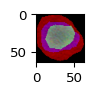

In [11]:
ia.imshow(image_test)

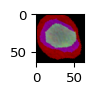

In [12]:
ia.imshow(seq.augment_image(image_test))

Let us add image augmentation component into image generator

In [13]:
from imgaug.augmenters import Sequential

class DataGenerator(Sequence):

    def __init__(self, dir: str, sample_size: Optional[int] = None, batch_size: int = 32, shuffle: bool = True, 
                 image_augmentation: Optional[Sequential] = None):
        
        """
        Args:
            dir: directory in which images are stored
            sample_size: Optional; number of images will be sampled in each of sub_directory,
            if not provided all images in the dir are taken into account.
            batch_size: number of images in each of batch
            shuffle: if shuffle the order of the data
        """
        
        self.dir = dir
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.sample_size = sample_size
        self.image_augmentation = image_augmentation  # new line

        self.on_epoch_end()

        self.max = self.__len__()
        self.n = 0

    def __transform_to_dataframe(self) -> pd.DataFrame:
        
        """
        transform the data into a pandas dataframe to track the image files and the corresponding labels
        """
        
        dirs = glob(f"{get_project_dir()}/data/{self.dir}/*")

        data = []
        
        # given df label: label
        # labels = np.unique(df[label])
        # for label in labels:
        #。 df_sub = self.df[self.df[label]==label]
        #。 files = df_sub['filename'].values
        
        
        for dir in dirs:

            files = glob(f"{dir}/*.png")
            if self.sample_size:  # modification
                if not self.image_augmentation:
                    sampled_files = random.sample(files, min(self.sample_size, len(files)))  # no repetition
                else:
                    sampled_files = random.choices(files, k=self.sample_size)  # repetition can take place
            else:
                sampled_files = files

            label = int(dir.split("/")[-1])

            for f in sampled_files:
                data.append([f, label])

        df = pd.DataFrame(data=data, columns=['filepath', 'label'], dtype=object)

        return df

    def on_epoch_end(self):
        
        self.df = self.__transform_to_dataframe()
        self.indices = self.df.index.tolist()

        self.index = np.arange(len(self.indices))
        if self.shuffle:
            np.random.shuffle(self.index)

    def __len__(self):
        #  Denotes the number of batches per epoch
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, index) -> Tuple[np.ndarray, np.ndarray]:
        # Generate one batch of data
        # Generate indices of the batch
        index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
        # Find list of IDs
        batch = [self.indices[k] for k in index]
        # Generate data
        X, y = self.__get_data(batch)

        return X, y

    def __get_data(self, batch: List) -> Tuple[np.ndarray, np.ndarray]:

        df_batch = self.df.loc[batch]

        image_dataset = []
        labels = []
        
        for _, row in df_batch.iterrows():
            f = row['filepath']
            if not self.image_augmentation:
                image_dataset.append(np.array(Image.open(f)) / 255.0)
            else:
                image_dataset.append(self.image_augmentation.augment_image(np.array(Image.open(f))) / 255.0)
            labels.append(row['label'])

        return np.array(image_dataset), np.array(labels)

    def __next__(self):
        
        """
        generate data of size batch_size
        """
        
        if self.n >= self.max:
            self.n = 0

        result = self.__getitem__(self.n)
        self.n += 1
        return result

In [14]:
sometimes = lambda aug: iaa.Sometimes(1, aug)  # apply operations on 100% of input data

# what kind of image augmentations are properly depend on DOMAIN KNOWLEDGE

seq = iaa.Sequential([sometimes(iaa.Affine(
                    scale={'x': (0.95, 1.05), 'y': (0.95, 1.05)},
                    rotate=(-45, 45),
                    cval=0))])

train_generator = DataGenerator('train', sample_size=10, batch_size=batch_size, image_augmentation=seq)
val_generator = DataGenerator('test', shuffle=False, batch_size=batch_size)

# images, labels = next(train_generator)

model.fit_generator(generator=train_generator, steps_per_epoch=int(np.ceil(len(train_generator.df))/batch_size),
                    validation_data=val_generator, epochs=10)

Epoch 1/10
 2/31 [>.............................] - ETA: 1s - loss: 65.0199 - mse: 64.8758

/Users/mling/miniconda3/envs/test/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


31/31 [==============================] - 2s 63ms/step - loss: 106.6451 - mse: 106.4987 - val_loss: 152.2406 - val_mse: 152.0918
Epoch 2/10
31/31 [==============================] - 2s 66ms/step - loss: 78.7388 - mse: 78.5883 - val_loss: 76.9440 - val_mse: 76.7914
Epoch 3/10
31/31 [==============================] - 2s 65ms/step - loss: 60.8397 - mse: 60.6853 - val_loss: 78.3103 - val_mse: 78.1541
Epoch 4/10
31/31 [==============================] - 2s 71ms/step - loss: 53.2609 - mse: 53.1026 - val_loss: 64.3901 - val_mse: 64.2299
Epoch 5/10
31/31 [==============================] - 2s 73ms/step - loss: 52.8535 - mse: 52.6912 - val_loss: 59.3089 - val_mse: 59.1444
Epoch 6/10
31/31 [==============================] - 2s 70ms/step - loss: 40.5871 - mse: 40.4209 - val_loss: 69.8431 - val_mse: 69.6749
Epoch 7/10
31/31 [==============================] - 2s 74ms/step - loss: 35.0459 - mse: 34.8761 - val_loss: 132.2164 - val_mse: 132.0444
Epoch 8/10
31/31 [==============================] - 2s 72ms/